Here we want to check if gaia classifications match OGLE classifications

In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
xmatch_path = '../../catalogues/cross-match-labels.csv'
ogle_path = '../../catalogues/ogle-variable-sources.csv'

In [3]:
xmatch_df = pd.read_csv(xmatch_path)
ogle_df = pd.read_csv(ogle_path)

/Users/Javiera/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (0,1,2,3,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ogle_ra = ogle_df['ra'][::3].values
ogle_dec = ogle_df['dec'][::3].values
ogle_coords = SkyCoord(ra=ogle_ra, dec=ogle_dec, unit=(u.hourangle, u.deg))

In [5]:
xmatch_ra = xmatch_df['ra_gaia'].values
xmatch_dec = xmatch_df['dec_gaia'].values
xmatch_coords = SkyCoord(ra=xmatch_ra*u.degree, dec=xmatch_dec*u.degree)

In [6]:
idx, d2d, _ = xmatch_coords.match_to_catalog_sky(ogle_coords)
distances = d2d.arcsecond
keep = distances <= 1
print(sum(keep))

0


In [7]:
ogle_ra_deg = ogle_coords.ra.degree
ogle_dec_deg = ogle_coords.dec.degree
xmatch_ra_deg = xmatch_coords.ra.degree
xmatch_dec_deg = xmatch_coords.dec.degree

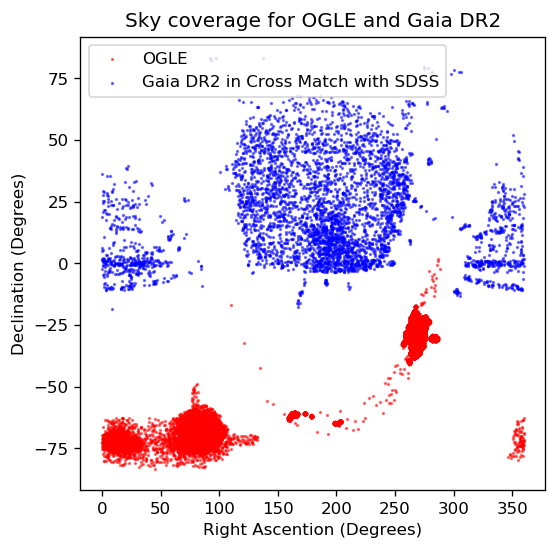

In [8]:
plt.figure(figsize=(5,5), dpi=120)
plt.scatter(ogle_ra_deg, ogle_dec_deg, alpha=0.5, c='r', label='OGLE', s=1)
plt.scatter(xmatch_ra_deg, xmatch_dec_deg, alpha=0.5, c='b', label='Gaia DR2 in Cross Match with SDSS', s=1)
plt.xlabel('Right Ascention (Degrees)')
plt.ylabel('Declination (Degrees)')
plt.title('Sky coverage for OGLE and Gaia DR2')
plt.legend()
plt.show()